In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
class LogReg:
    def __init__ (self, x,y):
        self.intercept = np.ones((x.shape[0],1))
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
    
    #calculating the sigmoid function
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
    
    #calculating the empirical loss function
    def loss(self,h,y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    
    def gradient_descent(self, X, h, y):
        return (np.dot(X.T, (h-y)) / y.shape[0])
    
    def fit(self, lr, iterations):
        arrloss = []
        arrit = []
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma, self.y)
            arrloss.append(loss)
            arrit.append(i)
            dw = self.gradient_descent(self.x,sigma,self.y)
            self.weight -= lr * dw
        print("data printed successfully")
        graph = plt.plot(arrit,arrloss)
        plt.xlabel("No of iterations")
        plt.ylabel("Loss")
        plt.axis([0, iterations, 0, 15])
        return graph
    
    def predict(self, x_new, th):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= th
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if (result[i] == True):
                y_pred[i] = 1
            else:
                continue
        return y_pred

data printed successfully
for ds1_train accuracy -> 0.775


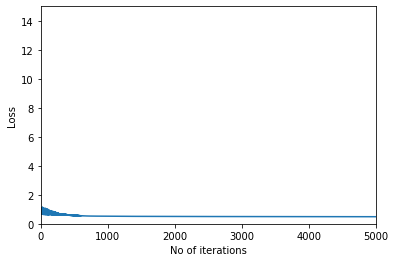

In [17]:
dtrain = pd.read_csv("ds1_train.csv")
dtest = pd.read_csv("ds1_test.csv")
xtrain = dtrain[['x_1','x_2']]
ytrain = dtrain['y']
xtr, xval, ytr, yval = train_test_split(xtrain, ytrain, test_size=0.5)
model = LogReg(xtr, ytr)
model.fit(0.001, 5000)
y_pred =  model.predict(xval,0.5)
print('for ds1_train accuracy -> {}'.format(sum(y_pred == yval)/yval.shape[0]))

data printed successfully
accuracy -> 0.74


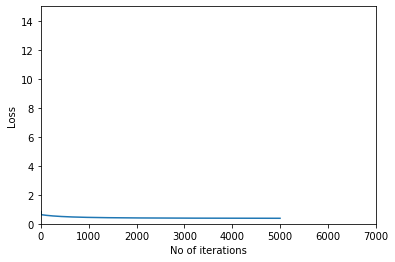

In [14]:
xtest = dtest[['x_1','x_2']]
ytest = dtest['y']
xtr1, xval1, ytr1, yval1 = train_test_split(xtest, ytest, test_size=0.5)
reg = LogReg(xtr1, ytr1)
reg.fit(0.001, 5000)
y_pred1 =  reg.predict(xval1,0.5)
print('accuracy -> {}'.format(sum(y_pred1 == yval1)/yval1.shape[0]))


data printed successfully
accuracy -> 0.775


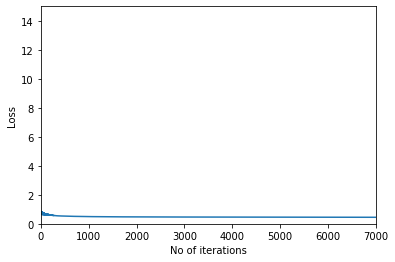

In [15]:
dtrain2 = pd.read_csv("ds2_train.csv")
dtest2 = pd.read_csv("ds2_test.csv")
xtrain2 = dtrain[['x_1','x_2']]
ytrain2 = dtrain['y']
xtr2, xval2, ytr2, yval2 = train_test_split(xtrain2, ytrain2, test_size=0.5)
model2 = LogReg(xtr2, ytr2)
model2.fit(0.001, 7000)
y_pred2 =  model2.predict(xval2,0.5)
print('accuracy -> {}'.format(sum(y_pred2 == yval2)/yval2.shape[0]))

data printed successfully
accuracy -> 0.9


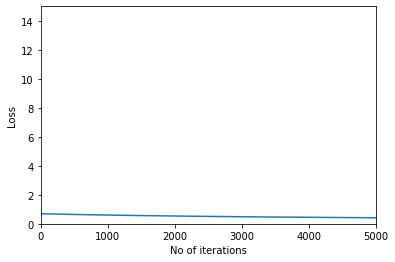

In [7]:
xtest2 = dtest2[['x_1','x_2']]
ytest2 = dtest2['y']
xtr3, xval3, ytr3, yval3 = train_test_split(xtest2, ytest2, test_size=0.5)
reg2 = LogReg(xtr3, ytr3)
reg2.fit(0.0010, 7000)
y_pred3 =  reg2.predict(xval3,0.5)
print('accuracy -> {}'.format(sum(y_pred3 == yval3)/yval3.shape[0]))
